A parity bit is a simple error-detection mechanism used in digital communication and data storage. Parity bit error-checking consists of appending an additional "parity bit" onto a binary message to ensure that the number of 1s in the message follows a predefined rule, either even or odd. This technique helps detect single-bit errors that may occur during transmission or storage.

Exercise 1

The code below shows a function that computes an even parity bit. It calculates the sum of all the bits in the data, and appends a parity bit appropriately, to make the sum of the data even. 

The code outside the function tests whether the function works.

In [10]:
# Function to compute even parity bit
def compute_even_parity(data):
    # Sum the data bits and take modulo 2.
    # If sum is odd, parity bit is 1 (to make total even); if even, parity bit is 0.
    return sum(data) % 2

# Original data bits (example)
data = [1, 0, 1, 0, 1, 1, 0, 0]
parity_bit = compute_even_parity(data)
print("Original Data: ", data)
print("Computed Parity Bit (Even):", parity_bit)
# Transmitted data: append parity bit to the data array
transmitted_data = data + [parity_bit]
print("\nTransmitted Data (Data + Parity):", transmitted_data)

Original Data:  [1, 0, 1, 0, 1, 1, 0, 0]
Computed Parity Bit (Even): 0

Transmitted Data (Data + Parity): [1, 0, 1, 0, 1, 1, 0, 0, 0]


Exercise 2

The code below simulates an error in data transmission. It flips one of the bits at the selected data index. 

In [ ]:
# Simulate an error: flip a bit in the transmitted data
# For example, flip the bit at index 3 (0-indexed)
error_index = 3
data_with_error = transmitted_data.copy()
data_with_error[error_index] = 1 - data_with_error[error_index]
print("\nData with an Error Introduced at index", error_index, ":",
data_with_error)

# At the receiver, perform the parity check.
# For even parity, the sum of all bits should be even.
if sum(data_with_error) % 2 == 0:
    print("\nNo error detected (Parity Check Passed)")
else:
    print("\nError detected (Parity Check Failed)")


Data with an Error Introduced at index 3 : [1, 0, 1, 1, 1, 1, 0, 0, 0]

Error detected (Parity Check Failed)


The code below is for a 2D parity check. It's an extended form of parity checking that enhances error detection by applying parity both horizontally and vertially in a block of data. This can even allow for simple error correction, as it's possible to detect the exact location of the error.

Row Parity: Each row of the data block is assigned a parity bit.

Column Parity: Each column of the data block is assigned a parity bit.

Overall Parity: A final parity bit can be added at the bottom right corner, acting as the parity bit for the row and column parity bits of the data.

Example data block:

Data       |Parity
-----------|-----
1, 0, 1, 1 | 1
0, 1, 0, 0 | 1
1, 1, 1, 0 | 1
0, 0, 1, 1 | 0
-----------|-----
0, 0, 1, 0 | 0  <- Parity bit for the vertical and horizontal parity

In [ ]:
import numpy as np
def compute_parity(mat):
    # Returns (row_parity, col_parity) for even parity
    return np.sum(mat, axis=1) % 2, np.sum(mat, axis=0) % 2

# Create a 4x4 data matrix
data = np.array([
    [1, 0, 1, 1],
    [0, 1, 0, 0],
    [1, 1, 1, 0],
    [0, 0, 1, 1]
])
print("Original Data:\n", data)

# Compute original parity bits
row_par, col_par = compute_parity(data)
print("Row Parity:", row_par)
print("Column Parity:", col_par)


Original Data:
 [[1 0 1 1]
 [0 1 0 0]
 [1 1 1 0]
 [0 0 1 1]]
Row Parity: [1 1 1 0]
Column Parity: [0 0 1 0]


The code below introduces an error to test the parity checking and error correction.

In [ ]:
# Introduce an error by flipping the bit at row 2, column 1 (0-indexed)
data_err = data.copy()
data_err[2, 1] = 1 - data_err[2, 1]
print("\nData with error at (2, 1):\n", data_err)

# Recompute parity bits after error
new_row_par, new_col_par = compute_parity(data_err)
print("New Row Parity:", new_row_par)
print("New Column Parity:", new_col_par)

# Detect and correct the error
err_row = np.where(new_row_par != row_par)[0]
err_col = np.where(new_col_par != col_par)[0]

if err_row.size == 1 and err_col.size == 1:
    error_location = (err_row[0], err_col[0])
    print("\nError detected at:", error_location)
    # Correct the error by flipping the bit back
    data_err[error_location] = 1 - data_err[error_location]
    print("Corrected Data:\n", data_err)
else:
    print("No single-bit error detected or multiple errors occurred.")


Data with error at (2, 1):
 [[1 0 1 1]
 [0 1 0 0]
 [1 0 1 0]
 [0 0 1 1]]
New Row Parity: [1 1 0 0]
New Column Parity: [0 1 1 0]

Error detected at: (np.int64(2), np.int64(1))
Corrected Data:
 [[1 0 1 1]
 [0 1 0 0]
 [1 1 1 0]
 [0 0 1 1]]


In the first function, One's Complement is carried out on the sum of the data. A checksum is created from the sum of the data, but in order not to have huge checksums for large data, whenever the sum of the data overflows the bit-size (16 in this case), One's compliment flips all the bits, to 0s (when it is all 1s) and the overflow is "carried" to the beginning of the checksum (added onto it, making it a small number). 

This is useful because the check can still be carried out, as the reciever will perform the same calculation, and end up with the same checksum. (Sort of like a hash function, but less complex) Because the checksum is overwritten every time it overflows, this calculation is non-reversible. (but it doesn't need to be)

In [14]:
def ones_complement_sum(a, b, bit_size=16):
    """Perform one's complement addition of two numbers."""
    result = a + b
    if result >= (1 << bit_size): # If there's an overflow
        result = (result + 1) & ((1 << bit_size) - 1) # Wrap around carry
    return result

def calculate_checksum(data, bit_size=16):
    """Compute one's complement checksum for a list of integers."""
    checksum = 0
    for word in data:
        checksum = ones_complement_sum(checksum, word, bit_size)
    return ~checksum & ((1 << bit_size) - 1) # One's complement

def verify_checksum(data, received_checksum, bit_size=16):
    """Verify the checksum by adding it to the computed sum."""
    total = 0
    for word in data:
        total = ones_complement_sum(total, word, bit_size)
    total = ones_complement_sum(total, received_checksum, bit_size)
    return total == (1 << bit_size) - 1 # Valid if all bits are 1

# Example Usage
data = [0b1010101010101010, 0b1100110011001100, 0b1111000011110000] # Example 16-bit words
checksum = calculate_checksum(data)
print(f"Calculated Checksum: {bin(checksum)}")

# Verification
is_valid = verify_checksum(data, checksum)
print("Checksum is valid" if is_valid else "Checksum is invalid")

Calculated Checksum: 0b1001011110010111
Checksum is valid


Multiple Access Protocols (MAP)

In [4]:
%pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


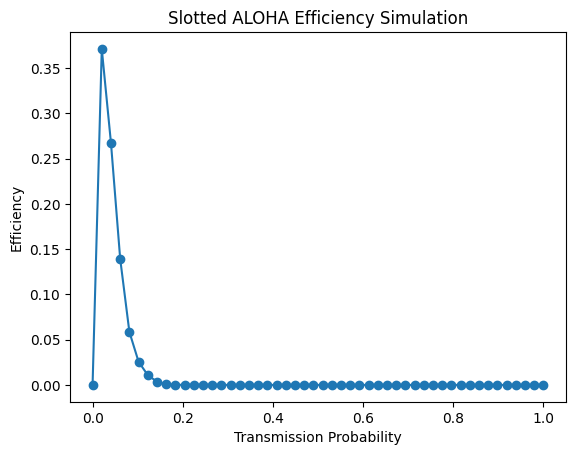

In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np
def simulate_slotted_aloha(n_nodes, p, n_slots):
    successes = 0
    for _ in range(n_slots):
        # Each node transmits with probability p in a slot
        transmissions = sum(1 for _ in range(n_nodes) if random.random() < p)
        if transmissions == 1:
            successes += 1
    efficiency = successes / n_slots
    return efficiency

n_nodes = 50
ps = np.linspace(0, 1, 50)
efficiencies = [simulate_slotted_aloha(n_nodes, p, 10000) for p in ps]

plt.plot(ps, efficiencies, marker='o')
plt.xlabel('Transmission Probability')
plt.ylabel('Efficiency')
plt.title('Slotted ALOHA Efficiency Simulation')
plt.show()